In [2]:
#Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Загрузка данных
df = pd.read_csv('S02-hw-dataset.csv')

In [7]:
#Первичный осмотр
print("Первые строки датасета:")
print(df.head())

print("\nИнформация о столбцах и типах:")
print(df.info())

print("\nБазовые описательные статистики:")
print(df.describe())

Первые строки датасета:
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296

Информация о столбцах и типах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None

Базовые описательные статистики:
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2

In [8]:
#Пропуски
print("Доля пропусков в каждом столбце:")
print(df.isna().mean())

Доля пропусков в каждом столбце:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [9]:
#Дубликаты
print("\nПроверка дубликатов:")
duplicated_rows = df.duplicated()
print(f"Количество дублирующихся строк (кроме первой): {duplicated_rows.sum()}")
if duplicated_rows.any():
    print("\nДублирующиеся строки (кроме первой):")
    print(df[duplicated_rows])


Проверка дубликатов:
Количество дублирующихся строк (кроме первой): 1

Дублирующиеся строки (кроме первой):
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511


In [10]:
#Подозрительные значения
print("\nПодозрительные значения:")
suspicious_age = df[df['age'] > 100]
if not suspicious_age.empty:
    print(f"Нереалистичный возраст (>100): \n{suspicious_age[['user_id', 'age']]}")

suspicious_purchases = df[df['purchases'] < 0]
if not suspicious_purchases.empty:
    print(f"Отрицательное количество покупок: \n{suspicious_purchases[['user_id', 'purchases']]}")

zero_revenue_nonzero_purchases = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
if not zero_revenue_nonzero_purchases.empty:
    print(f"Нулевой доход при ненулевых покупках: \n{zero_revenue_nonzero_purchases[['user_id', 'purchases', 'revenue']]}")

nonzero_revenue_zero_purchases = df[(df['revenue'] > 0) & (df['purchases'] == 0)]
if not nonzero_revenue_zero_purchases.empty:
    print(f"Ненулевой доход при нулевых покупках: \n{nonzero_revenue_zero_purchases[['user_id', 'purchases', 'revenue']]}")


Подозрительные значения:
Нереалистичный возраст (>100): 
   user_id    age
5        6  120.0
Отрицательное количество покупок: 
   user_id  purchases
5        6         -1
Нулевой доход при ненулевых покупках: 
    user_id  purchases  revenue
10       11          4        0


## Текстовое описание проблем
Проблемы качества данных:
1. Пропуски: В столбце 'age' встречаются пропущенные значения (NaN).
2. Дубликаты: В датасете присутствует одна полностью дублирующая строка (user_id=10).
3. Подозрительные значения:
    - Нереалистичный возраст: Значение 120 лет (user_id=6).
    - Отрицательное количество покупок: Значение -1 (user_id=6).
    - Логические противоречия:
      - Пользователь совершил покупки, но общий доход равен 0 (user_id=11).
      - Пользователь имеет нулевое количество покупок, но ненулевой доход (user_id=7, user_id=18).

In [11]:
#Частоты категориальных переменных
print("Частоты стран (country):")
print(df['country'].value_counts())

Частоты стран (country):
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [12]:
#Группировка с агрегатами
print("\nСредняя выручка и количество покупок по странам:")
country_stats = df.groupby('country').agg({
    'revenue': ['mean', 'sum'],
    'purchases': ['mean', 'sum']
}).round(2)
print(country_stats)


Средняя выручка и количество покупок по странам:
         revenue        purchases    
            mean    sum      mean sum
country                              
CN       1054.00   2108      4.50   9
DE       1445.50   8673      6.50  39
FR        675.92   8111      4.25  51
RU        790.08  10271      4.77  62
US        557.38   4459      4.62  37


## Текстовое описание наблюдений
 Основные наблюдения:
 - Самые распространенные страны в датасете - RU (Россия) и FR (Франция).
 - Средняя и общая выручка в US (США) и DE (Германия) значительно выше, чем в других странах.
 - Среднее количество покупок в DE (Германия) самое высокое.

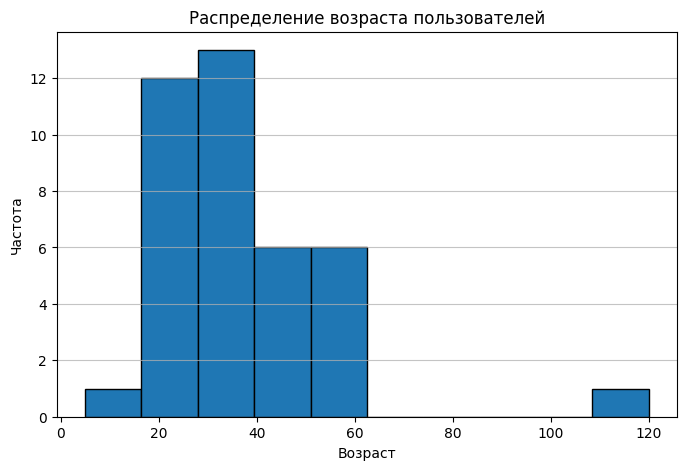

In [13]:
#Гистограмма
plt.figure(figsize=(8, 5))

plt.hist(df['age'].dropna(), bins=10, edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

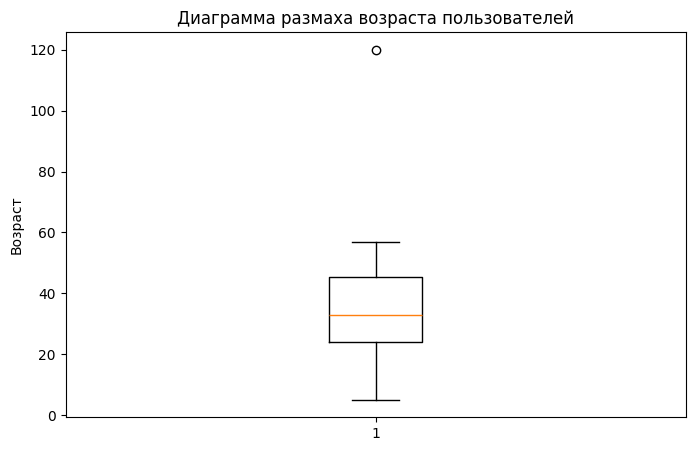

In [23]:
#Диаграмма размаха возраста
plt.figure(figsize=(8, 5))
plt.boxplot(df['age'].dropna())
plt.title('Диаграмма размаха возраста пользователей')
plt.ylabel('Возраст')
plt.show()

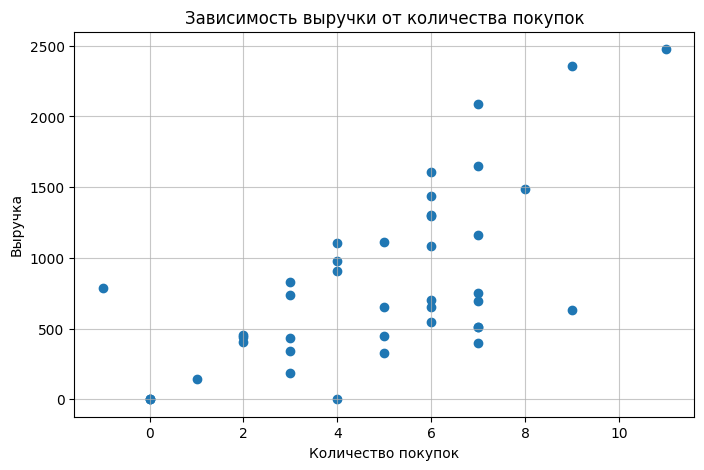

In [24]:
# Зависимость выручки от количества покупок
plt.figure(figsize=(8, 5))
plt.scatter(df['purchases'], df['revenue'])
plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.grid(True, alpha=0.7)
plt.show()

График гистограммы сохранен в figures/histogram_age.png


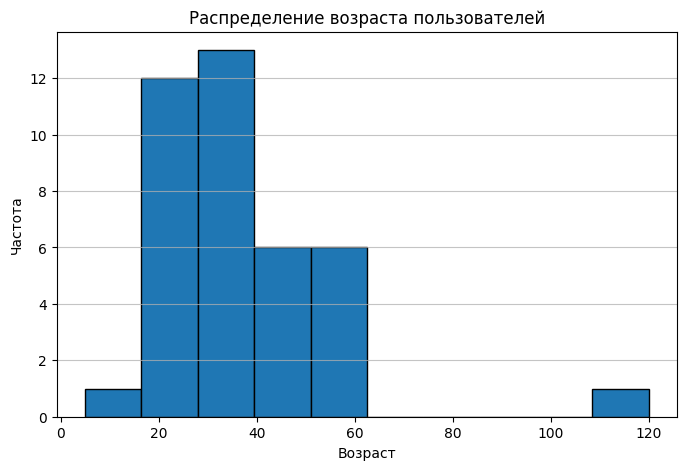

In [20]:
plt.figure(figsize=(8, 5))
plt.hist(df['age'].dropna(), bins=10, edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)

plt.savefig('figures/histogram_age.png', dpi=300, bbox_inches='tight')
print("График гистограммы сохранен в figures/histogram_age.png")
plt.show()

График гистограммы сохранен в figures/boxplot_age.png


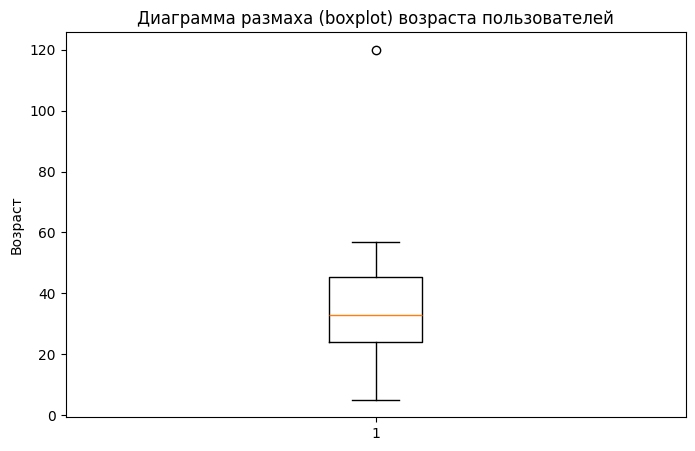

In [25]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['age'].dropna())
plt.title('Диаграмма размаха (boxplot) возраста пользователей')
plt.ylabel('Возраст')
plt.savefig('figures/boxplot_age.png', dpi=300, bbox_inches='tight')
print("График гистограммы сохранен в figures/boxplot_age.png")
plt.show()

График гистограммы сохранен в figures/scatter_purchases_revenue.png


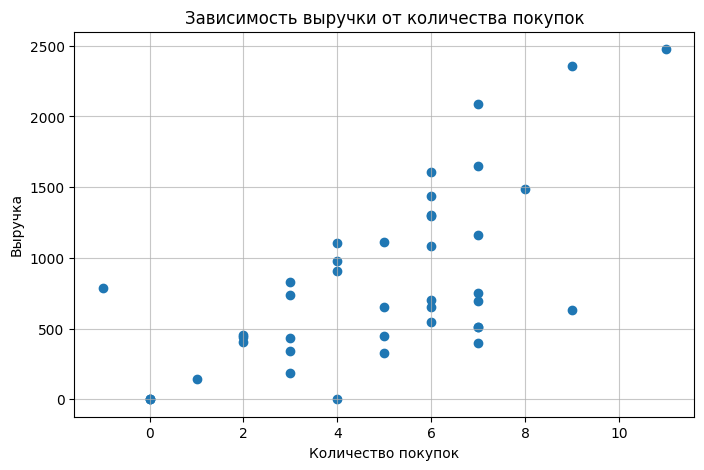

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(df['purchases'], df['revenue'])
plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.grid(True, alpha=0.7)
plt.savefig('figures/scatter_purchases_revenue.png', dpi=300, bbox_inches='tight')
print("График гистограммы сохранен в figures/scatter_purchases_revenue.png")
plt.show()

## Комментарии к графикам
 Гистограмма показывает распределение возраста пользователей. Присутствует выброс (возраст 120).
 Диаграмма размаха возраста подтверждает наличие выброса в данных возраста.
 Зависимость выручки от количества покупок показывает положительную корреляцию между количеством покупок и выручкой, хотя есть и исключения (например, 0 покупок, но ненулевая выручка).